In [30]:
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
df = pd.read_csv("../Datasets/Lung_Cancer_Clean_Data.csv")
df.head()

,Cancer_Level,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,0,33,1,2,4,5,4,3,2,2,...,4,3,4,2,2,3,1,2,3,4
1,1,17,1,3,1,5,3,4,2,2,...,3,1,3,7,8,6,2,1,7,2
2,2,35,1,4,5,6,5,5,4,6,...,8,8,7,9,2,1,4,6,7,2
3,2,37,1,7,7,7,7,6,7,7,...,8,4,2,3,1,4,5,6,7,5
4,2,46,1,6,8,7,7,7,6,7,...,9,3,2,4,1,4,2,4,2,3


<AxesSubplot:xlabel='Cancer_Level', ylabel='count'>

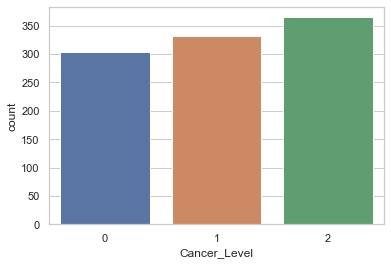

In [39]:
sns.countplot(x="Cancer_Level", data=df)

In [46]:
cancer_level_0 = len(df[df["Cancer_Level"]==0])
pct_of_lvl_0 = cancer_level_0 / len(df["Cancer_Level"]) * 100

cancer_level_1 = len(df[df["Cancer_Level"]==1])
pct_of_lvl_1 = cancer_level_1 / len(df["Cancer_Level"]) * 100

cancer_level_2 = len(df[df["Cancer_Level"]==2])
pct_of_lvl_2 = cancer_level_2 / len(df["Cancer_Level"]) * 100

print(f"Amount of Patients ____ Cancer_0: {cancer_level_0}")
print(f"Percent of Patients ____ Cancer_0: {pct_of_lvl_0}%")
print(f"Amount of Patients ____ Cancer_1: {cancer_level_1}")
print(f"Percent of Patients ____ Cancer_1: {pct_of_lvl_1}%")
print(f"Amount of Patients ____ Cancer_2: {cancer_level_2}")
print(f"Percent of Patients ____ Cancer_2: {pct_of_lvl_2}%")

Amount of Patients ____ Cancer_0: 303
Percent of Patients ____ Cancer_0: 30.3%
Amount of Patients ____ Cancer_1: 332
Percent of Patients ____ Cancer_1: 33.2%
Amount of Patients ____ Cancer_2: 365
Percent of Patients ____ Cancer_2: 36.5%


<AxesSubplot:xlabel='Cancer_Level', ylabel='count'>

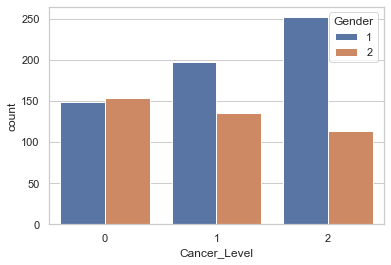

In [40]:
sns.countplot(x="Cancer_Level", data=df, hue="Gender")

## Train Test Split

In [4]:
y = df['Cancer_Level'].values
X = df.drop('Cancer_Level', axis=1)
X.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
82,48,2,6,8,7,7,7,6,2,4,...,3,2,7,6,5,1,9,3,4,2
991,37,1,8,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3
789,39,1,4,5,6,6,5,4,6,6,...,6,5,3,2,4,3,1,7,5,6
894,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
398,44,1,2,1,5,3,2,3,2,4,...,4,6,7,2,5,8,1,3,2,3


## Logistic Regression

In [ ]:
classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train, y_train)
print(f"Training Model Score: {classifier.score(X_train, y_train)}")